In [2]:
import seaborn as sns
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

p = 0.6
q = 1- 0.6

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [4]:
p ** 5

0.07775999999999998

In [5]:
r = (p ** 5) * (q ** 15)

In [6]:
r

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [7]:
combinaciones = (20 * 19 * 18 * 17 * 16) / (5 * 4 * 3 * 2 * 1)
combinaciones

15504.0

In [8]:
mi_respuesta = r * combinaciones
mi_respuesta

0.0012944935222876579

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [9]:
my_binomial = binom(20, 0.6)
my_binomial

Me hago una distribución binomial, donde de 20 opciones hay una probabilidad de 0,6 de que salga una manzana

In [10]:
my_binomial.rvs(1)

array([15])

Le pido que me haga una prueba y en esa prueba salen 10 manzanas

In [11]:
my_binomial.cdf(4)

0.0003170311211686301

Le pregunto a mi distribución binomial que cuál es la probabilidad acumulada de que salgan 4 manzanas o menos y me dice que es de 0.00032 aproximadamente

Para hallar eso se hace mediante la suma de todas las probabilidades inferiores a 5, que se le puede preguntar a Python con .pmf o se puede calcular con la fórmula abajo descrita

In [12]:
my_binomial.pmf(4)

0.0002696861504765946

P(4) = (20! / 4! * 16!) * (0.6 ** 4) * (0.4 ** 16)

In [13]:
((20 * 19 * 18 * 17) / (4 * 3 * 2)) * (0.6 ** 4) * (0.4 ** 16)

0.00026968615047659537

Si hiciesemos lo mismo con el 3, el dos el uno y el cero y lo sumasemos tendríamos el cdf (la acumulación de probabilidad) de 4

In [14]:
my_binomial.pmf(4) + my_binomial.pmf(3) + my_binomial.pmf(2) + my_binomial.pmf(1)  + my_binomial.pmf(0)

0.0003170311211686292

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

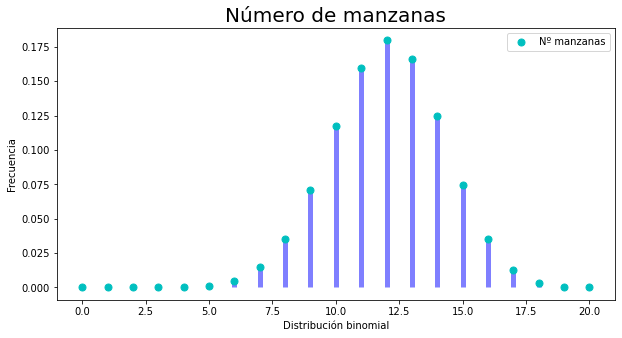

In [16]:
x = np.arange(0,21) # Me creo mi listita de posibles eventos


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, my_binomial.pmf(x), 'co', markersize=7, label = 'Nº manzanas') #le digo que cada valor de x es el pmf de x
ax.vlines(x, 0, my_binomial.pmf(x), colors='b', lw=5, alpha=0.5)
plt.title('Número de manzanas', size=20)
plt.xlabel('Distribución binomial')
plt.ylabel('Frecuencia')
plt.legend()



## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [18]:
import math

$P(X=k)=\frac{\lambda ^{k}e^{-\lambda }}{k!}$

In [19]:
lambda_ = 2.3 # Media teórica de que se marquen goles
k = 5 # Valor que queremos calcular

P(5) = ((2.3 ** 5) * (np.e ** (-lambda_)))/5!

In [20]:
((lambda_ ** k) * (np.e ** (-lambda_))) / math.factorial(k)

0.05377502558194681

In [21]:
my_poisson = poisson(mu=2.3)
my_poisson.pmf(5)

0.053775025581946814

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

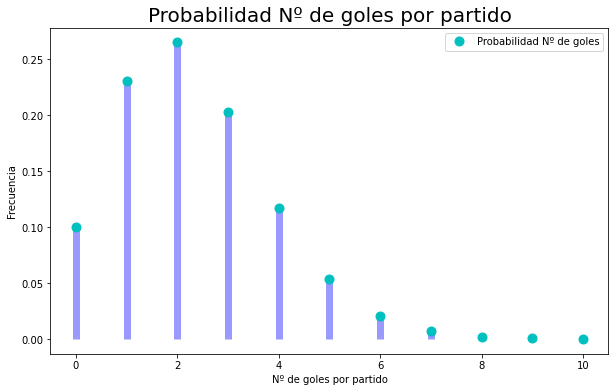

In [26]:
# your code here
x = np.arange(0, 11)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, my_poisson.pmf(x), 'co', markersize=9, label = 'Probabilidad Nº de goles')
ax.vlines(x, 0, my_poisson.pmf(x), colors='b', lw=7, alpha=0.4)
plt.title('Probabilidad Nº de goles por partido', size=20)
plt.xlabel('Nº de goles por partido')
plt.ylabel('Frecuencia')
plt.legend()
# Please label the axes and give a title to the plot 